In [2]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [3]:
datagen = ImageDataGenerator()

In [4]:
# define classes name
class_names = ['major accident', 'minor accident','non Accident']

In [5]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/admin/Documents/data/dataset/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="categorical", 
)

Found 685 images belonging to 3 classes.


In [6]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/admin/Documents/data/dataset/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 201 images belonging to 3 classes.


In [7]:
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/admin/Documents/data/dataset/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="categorical", 
)

Found 201 images belonging to 3 classes.


In [8]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [9]:
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint(
            "model_weights.keras",  # Adjust filepath to end with '.keras'
            monitor='val_accuracy',
            verbose=1,
            save_best_only=True,
            mode='max'
        )
    callbacks_list = [checkpoint]
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size, callbacks=callbacks_list)

In [11]:
model_history = trainModel(model = model, epochs = 20, optimizer = "Adam")

Epoch 1/25


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5625 - loss: 0.8175
Epoch 1: val_accuracy improved from -inf to 0.41791, saving model to model_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 216s 8s/step - accuracy: 0.5647 - loss: 0.8148 - val_accuracy: 0.4179 - val_loss: 0.5382
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6874 - loss: 0.5023
Epoch 2: val_accuracy improved from 0.41791 to 0.61194, saving model to model_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 211s 10s/step - accuracy: 0.6875 - loss: 0.5014 - val_accuracy: 0.6119 - val_loss: 0.4510
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7325 - loss: 0.4001
Epoch 3: val_accuracy improved from 0.61194 to 0.85075, saving model to model_weights.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 202s 9s/step - accuracy: 0.7329 - loss: 0.3983 - val_accuracy: 0.8507 - val_loss: 0.3767
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8337 - loss: 0.2452
Epoch 4: val_accuracy did not improve from 0.85075
22/22 

In [12]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save("model6.h5")

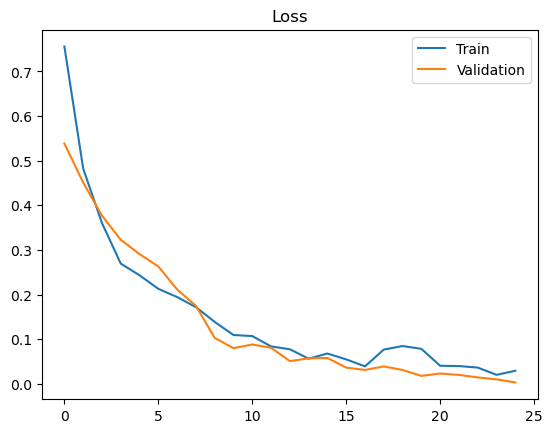

In [13]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

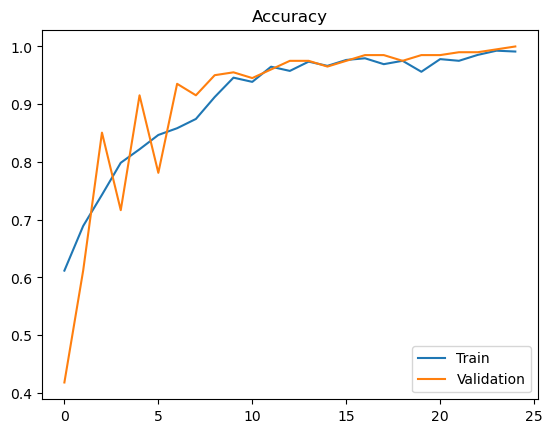

In [14]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 1.0000 - loss: 0.0039
The test loss is:  0.0030416641384363174
The best accuracy is:  100.0


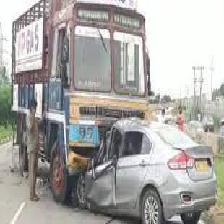

In [17]:
img = tf.keras.preprocessing.image.load_img('image1.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [18]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
[[1.000000e+00 1.015350e-08 5.975185e-10]]


In [ ]:
class_names = ['major accident', 'minor accident', 'non Accident']

predicted_index = np.argmax(predictions)

predicted_class = class_names[predicted_index]

print(f"Predicted class: {predicted_class}")